<h1>COMP6235 Further Assessment</h1>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('comp6235_dataset.csv')

In [3]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


- Extract month and year from the date

In [4]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

<h3>Data Cleaning<h3>

In [5]:
df = df.drop('show_id',axis=1) # Drop show id column

In [6]:
df.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9.0,2019.0
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9.0,2016.0
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9.0,2018.0


In [7]:
dup = df.duplicated() # show list of duplicate programs
df[dup]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
2124,Movie,Sarkar,A.R. Murugadoss,"Vijay, Varalakshmi Sarathkumar, Keerthi Suresh...",India,2019-03-02,2018,TV-MA,162 min,"Action & Adventure, Dramas, International Movies",A ruthless businessman’s mission to expose ele...,3.0,2019.0


In [8]:
df = df.drop_duplicates()

<h3>Data Analysis</h3><br>
- Find the distribution of rating types<br>
- Find the distribution of content types<br>
- Find the contents released in the month<br>
- Find the contents released in the year<br>
- Comparing between types of content in theUS, Japan and India

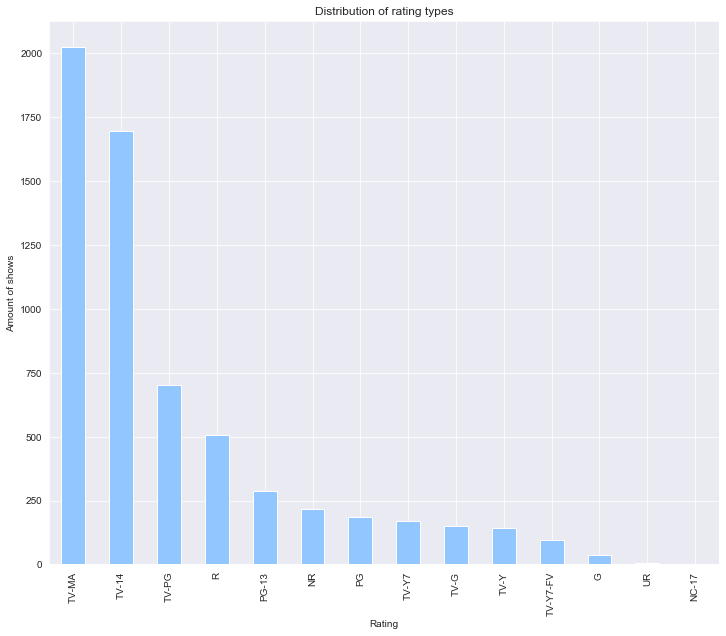

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(12,10))
df['rating'].value_counts().plot.bar()
plt.title('Distribution of rating types')
plt.xlabel('Rating')
plt.ylabel('Amount of shows')
plt.show()
plt.savefig('fig1.png')

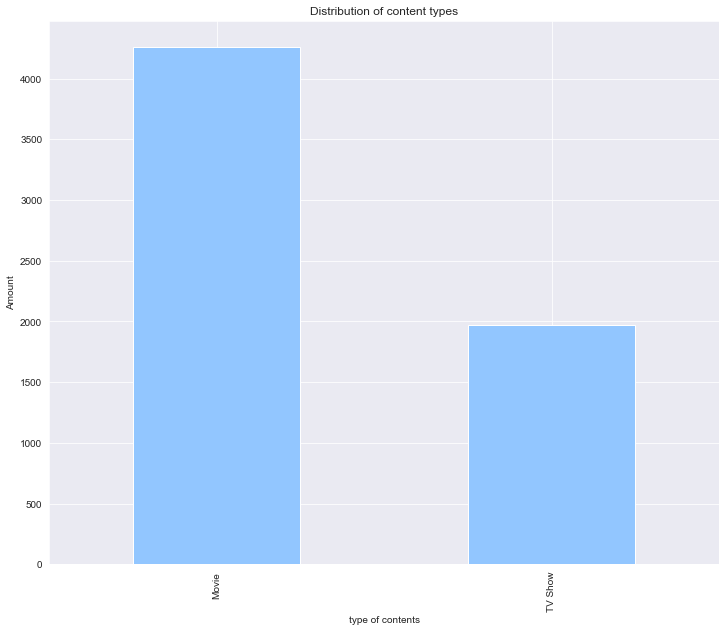

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(12,10))
df['type'].value_counts().plot.bar()
plt.title('Distribution of content types')
plt.xlabel('type of contents')
plt.ylabel('Amount')
plt.show()
plt.savefig('fig2.png')

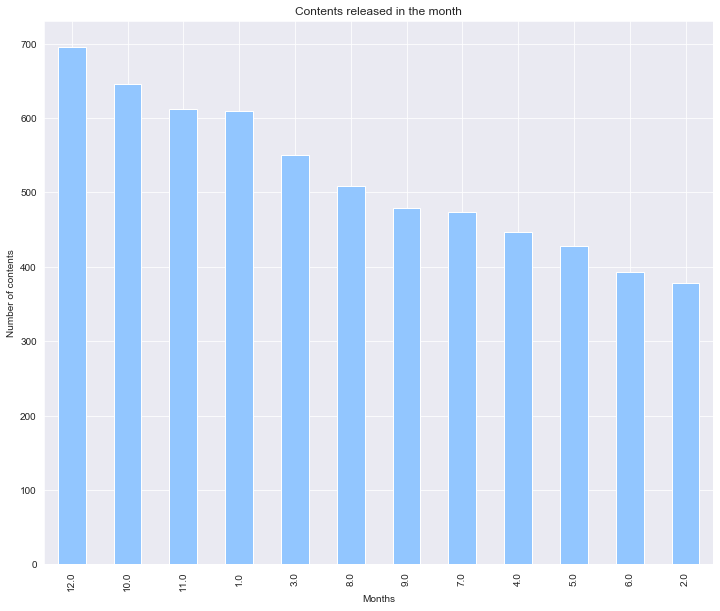

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(12,10))
df['month_added'].value_counts().plot.bar()
plt.title('Contents released in the month')
plt.xlabel('Months')
plt.ylabel('Number of contents')
plt.show()
plt.savefig('fig3.png')

In [12]:
df['year_added'].value_counts()

2019.0    2348
2018.0    1782
2017.0    1300
2016.0     456
2020.0     184
2015.0      90
2014.0      25
2011.0      13
2013.0      12
2012.0       7
2009.0       2
2008.0       2
2010.0       1
Name: year_added, dtype: int64

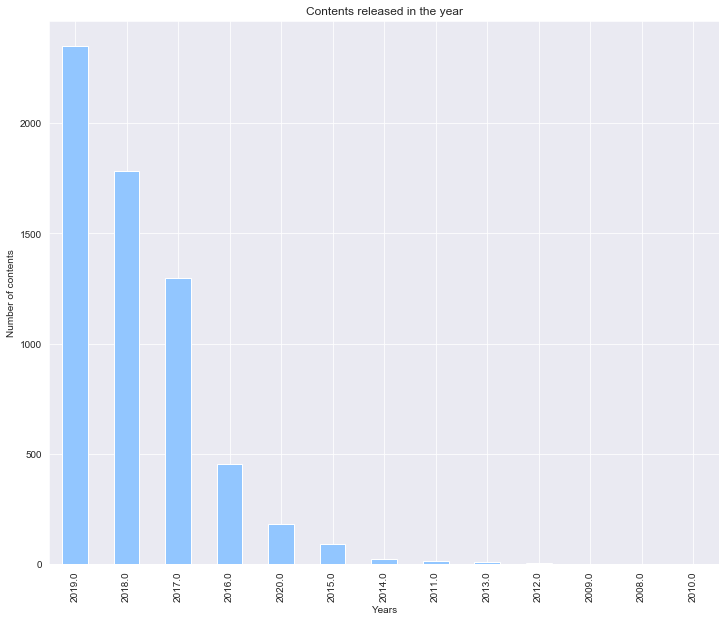

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(12,10))
df['year_added'].value_counts().plot.bar()
plt.title('Contents released in the year')
plt.xlabel('Years')
plt.ylabel('Number of contents')
plt.show()
plt.savefig('fig4.png')

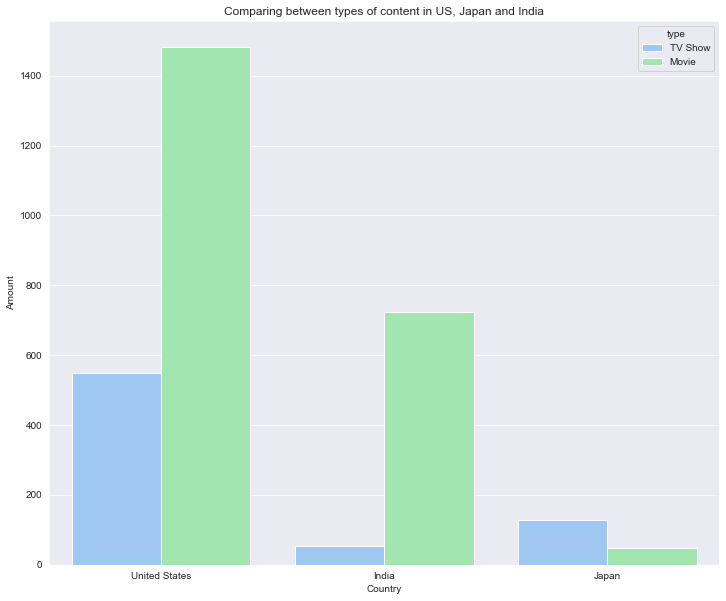

<Figure size 432x288 with 0 Axes>

In [14]:
compare = df[(df['country']=='United States')|(df['country']=='Japan')|(df['country']=='India')]
plt.figure(figsize=(12,10))
sns.countplot(x='country', hue='type', data=compare)
plt.title('Comparing between types of content in US, Japan and India')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.show()
plt.savefig('fig5.png')